<a href="https://colab.research.google.com/github/ridwanabdiansah29/Submission-Dicoding-ML-Terapan1/blob/main/Ridwan_Abdiansah_MLT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics

## Data Understanding

##### Dataset : Wine Quality Dataset from https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

### Import Libraries

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Data Loading

In [ ]:
od.download("https://www.kaggle.com/datasets/yasserh/wine-quality-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ridwanm193x0386
Your Kaggle Key: ··········


100%|██████████| 21.5k/21.5k [00:00<00:00, 11.7MB/s]

In [ ]:
# load the datase
df_wine = pd.read_csv('/content/wine-quality-dataset/WineQT.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


Output kode di atas memberikan informasi sebagai berikut:

Ada 1143 baris (records atau jumlah pengamatan) dalam dataset.
Terdapat 13 kolom yaitu fixed acidity,	volatile acidity,	citric acid,	residual sugar,	chlorides,	free sulfur dioxide,	total sulfur dioxide,	density,	pH,	sulphates,	alcohol.	quality dan	Id

### Exploratory Data Analysis - Deskripsi Variabel

#### Deskripsi Variabel

Berdasarkan informasi dari kaggle, variabel-variabel pada Wine Quality Dataset adalah sebagai berikut:
1. fixed acidity merupakan derajat keasaman dengan nilai dari 4,6 sampai 15,9
2. volatile acidity merupakan penguapan keasaman dengan nilai 0,12 sampai dengan 1,58
3. citric acid merupakan nilai dari asam sitrat dengan nilai 0 sampai 1
4. residual sugar merupakan nilai gula mulai dari 0,9 sampai 15,5
5. chlorides merupakan khlorida dengan nilai 0,01 sampai 0,61
6. free sulfur dioxide merupakan nilai sulfur mulai dari 1 sampai 68
7. total sulfur dioxide nilai total sulfur mulai dari 6 sampai 289
8. density merupakan nilai kepadatan mulai dari 0,99 sampai 1
9. pH merupakan nilai hidrogen dengan derajat keasaman mulai dari 2,74 sampai 4,01
10. sulphates merupakan nilai asam sulfat mulai dari 0,33 sampai 2
11. alcohol
12. qulity
13. id

Berdasarkan pada informasi d kaggle bahwa nilai dari alcohol tidak didapatkan.

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Dari output terlihat bahwa:

* Semua kolom (fitur) merupakan fitur numerik.
* Semua fitur numerik memiliki tipe data yang sama yaitu float64 kecuali fitur quality yang akan menjadi target yang akan kita gunakan.
* Fitur quality merupakan target fitur dalam case kali ini

Dari uraian di atas menunjukkan bahwa setiap kolom telah memiliki tipe data yang sesuai. Selanjutnya kita perlu mengecek deskripsi statistik data dengan fitur describe().

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count adalah jumlah sample pada data.
* Mean adalah nilai rata-rata
* Std adalah standar deviasi
* Min yaitu nilai minimum setiap kolom
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.





### Exploratory Data Analysis - Menangani Missing Value dan Outliers

#### Menangani Missing Value

cara cek ada berapa missing value (NULL, NaN) pada semua kolom.

In [ ]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Dari output isnull().sum() terlihat bahwa setiap fitur tidak memiliki nilai NULL maupun NAN sehingga sekarang kita bisa lanjutkan ke tahapan selanjutnya yaitu menangani outliers.

#### Menangani Outliers

Pada kasus ini, kita akan mendeteksi outliers dengan teknis visualisasi data (boxplot). Kemudian kita akan menangani outliers dengan metode IQR.

Sekarang, mari kita lakukan visualisasi pada fitur numerik.

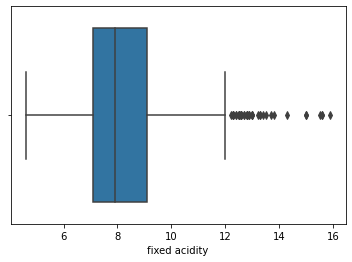

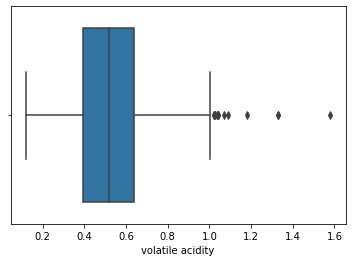

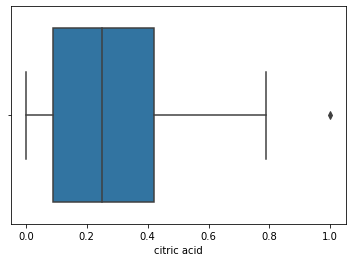

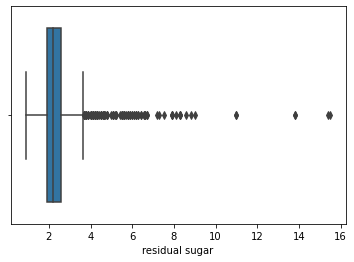

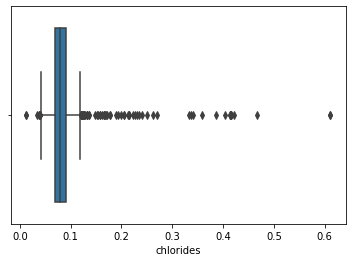

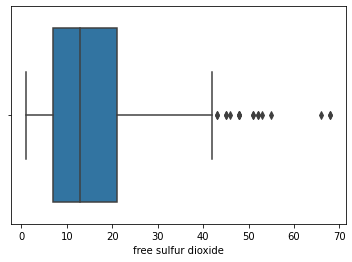

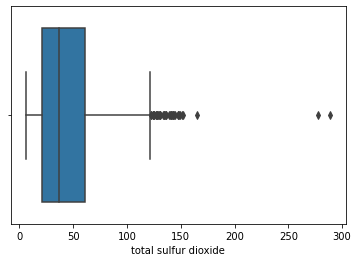

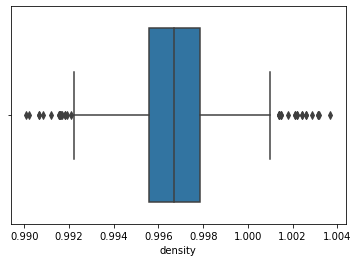

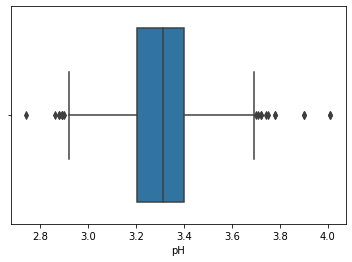

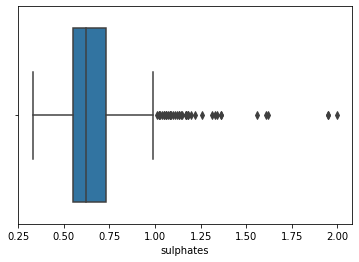

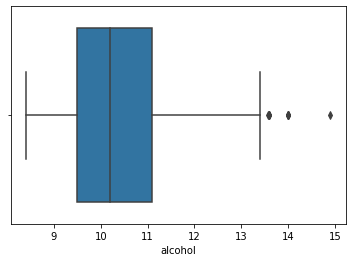

In [ ]:
for fitur in df_wine.keys():
  # Selain target dan Id
  if fitur=='quality' or fitur=='Id':
    continue
  sns.boxplot(x=df_wine[fitur])
  plt.show()

Jika kita perhatikan kembali, hampir semua fitur numerik di atas terdapat outliers. Kita akan menggunakan metode IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier.

Seltman dalam “Experimental Design and Analysis” [1] menyatakan bahwa outliers yang diidentifikasi oleh boxplot (disebut juga “boxplot outliers”) didefinisikan sebagai data yang nilainya 1.5 IQR di atas Q3 atau 1.5 IQR di bawah Q1.

Berikut persamaannya:

Batas bawah = Q1 - 1.5 * IQR
Batas atas = Q3 + 1.5 * IQR
Mari kita terapkan ke dalam kode

#### Menggunakan Metode IQR untuk menanganin Outlier

In [ ]:
Q1 = df_wine.quantile(0.25)
Q3 = df_wine.quantile(0.75)
IQR=Q3-Q1
df_wine=df_wine[~((df_wine<(Q1-1.5*IQR))|(df_wine>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df_wine.shape

(834, 13)

Sebelum proses menghilangkan outlier, ukuran dataset adalah (1143, 13)
Setelah proses menghilangkan outlier, ukuran dataset adalah (834, 13)
Banyak outlier yang dibersihkan sebanyak 1143 - 834 = 309 (baris atau sampel). Kita akan cek kembali dengan boxplot setelah membersihkan outlier.

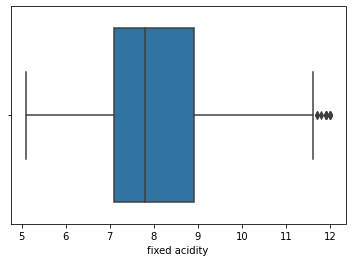

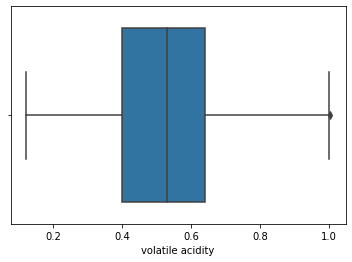

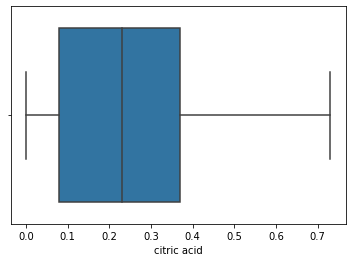

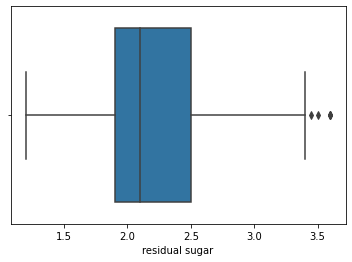

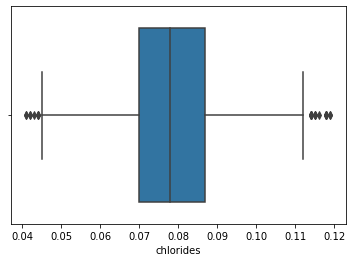

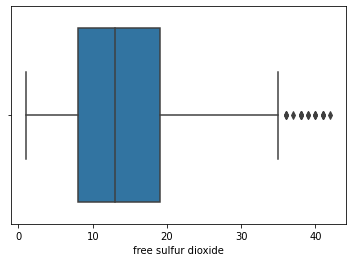

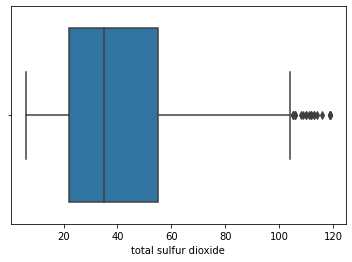

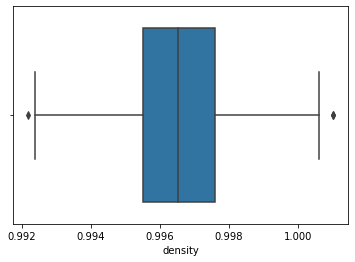

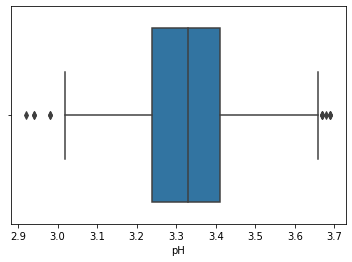

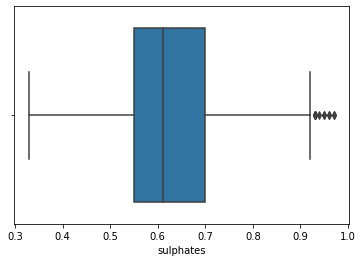

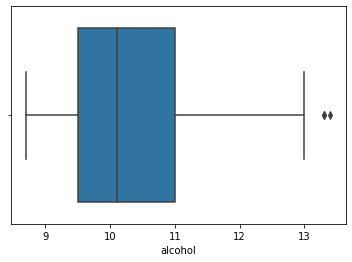

In [ ]:
for fitur in df_wine.keys():
  # Selain target dan Id
  if fitur=='quality' or fitur=='Id':
    continue
  sns.boxplot(x=df_wine[fitur])
  plt.show()

Dari hasil deteksi ulang outlier dengan boxplot di atas, didapat bahwa outlier sudah berkurang setelah dibersihkan.
Hanya fitur citric acid yang sudah bersih dari outlier.

### Exploratory Data Analysis - Univariate Analysis

Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate EDA. Pada kasus ini semua fiturnya adalah fitur numerik dan tidak ada fitur kategorikal. Sehingga kita hanya perlu lakukan analisa terhadap fitur numerik sebagai berikut:

####Analisa Fitur Numerik

Kita akan melihat histogram masing-masing fitur menggunakan kode berikut

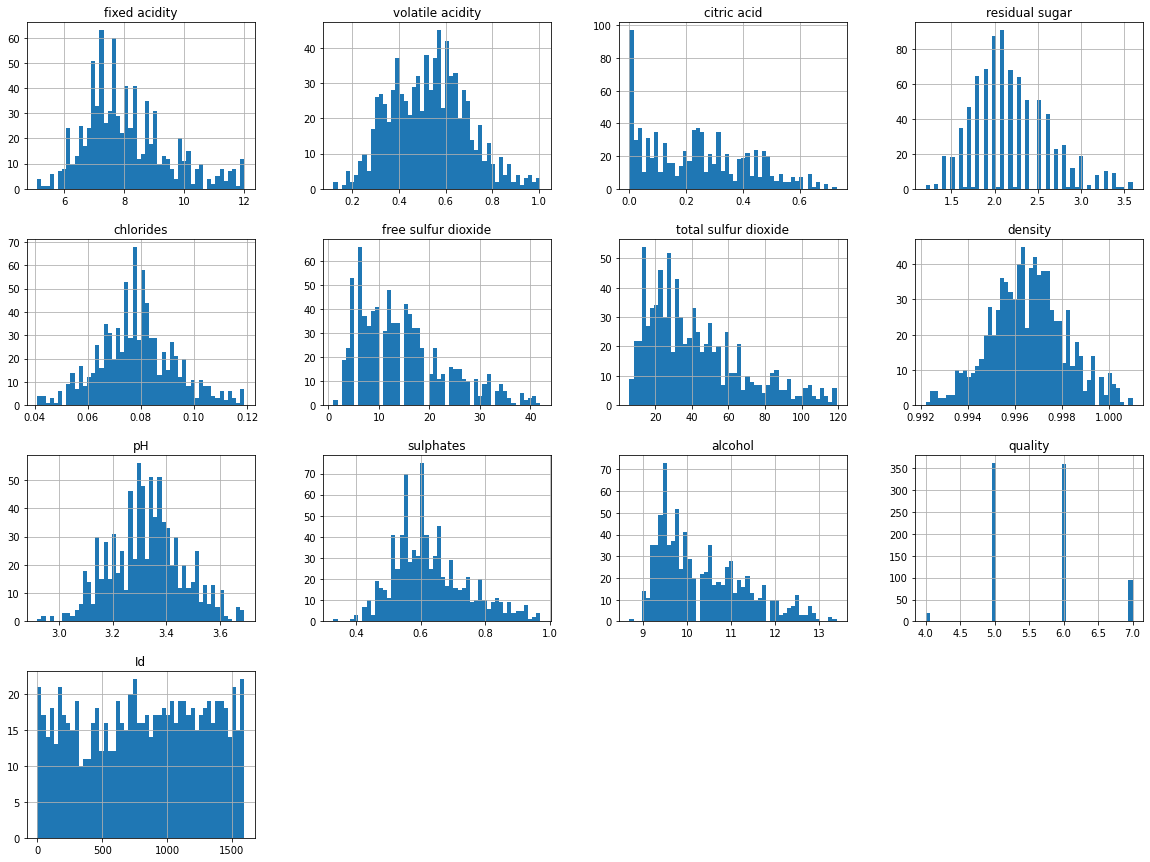

In [ ]:
df_wine.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil visualisasi histogram di atas, kita bisa memperoleh beberapa informasi, antara lain:

Distribusi fitur quality (target) cenderung miring ke kanan (right-skewed).

Karena beberapa fitur belum terdistribusi normal hal ini akan berimplikasi pada model, maka selanjutnya kita lakukan transformasi data (non-linear scaling). Namun, sebelum itu kita cek terlebih dahulu hubungan antara fitur numerik tersebut.

### Exploratory Data Analysis - Multivariate Analysis

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot().

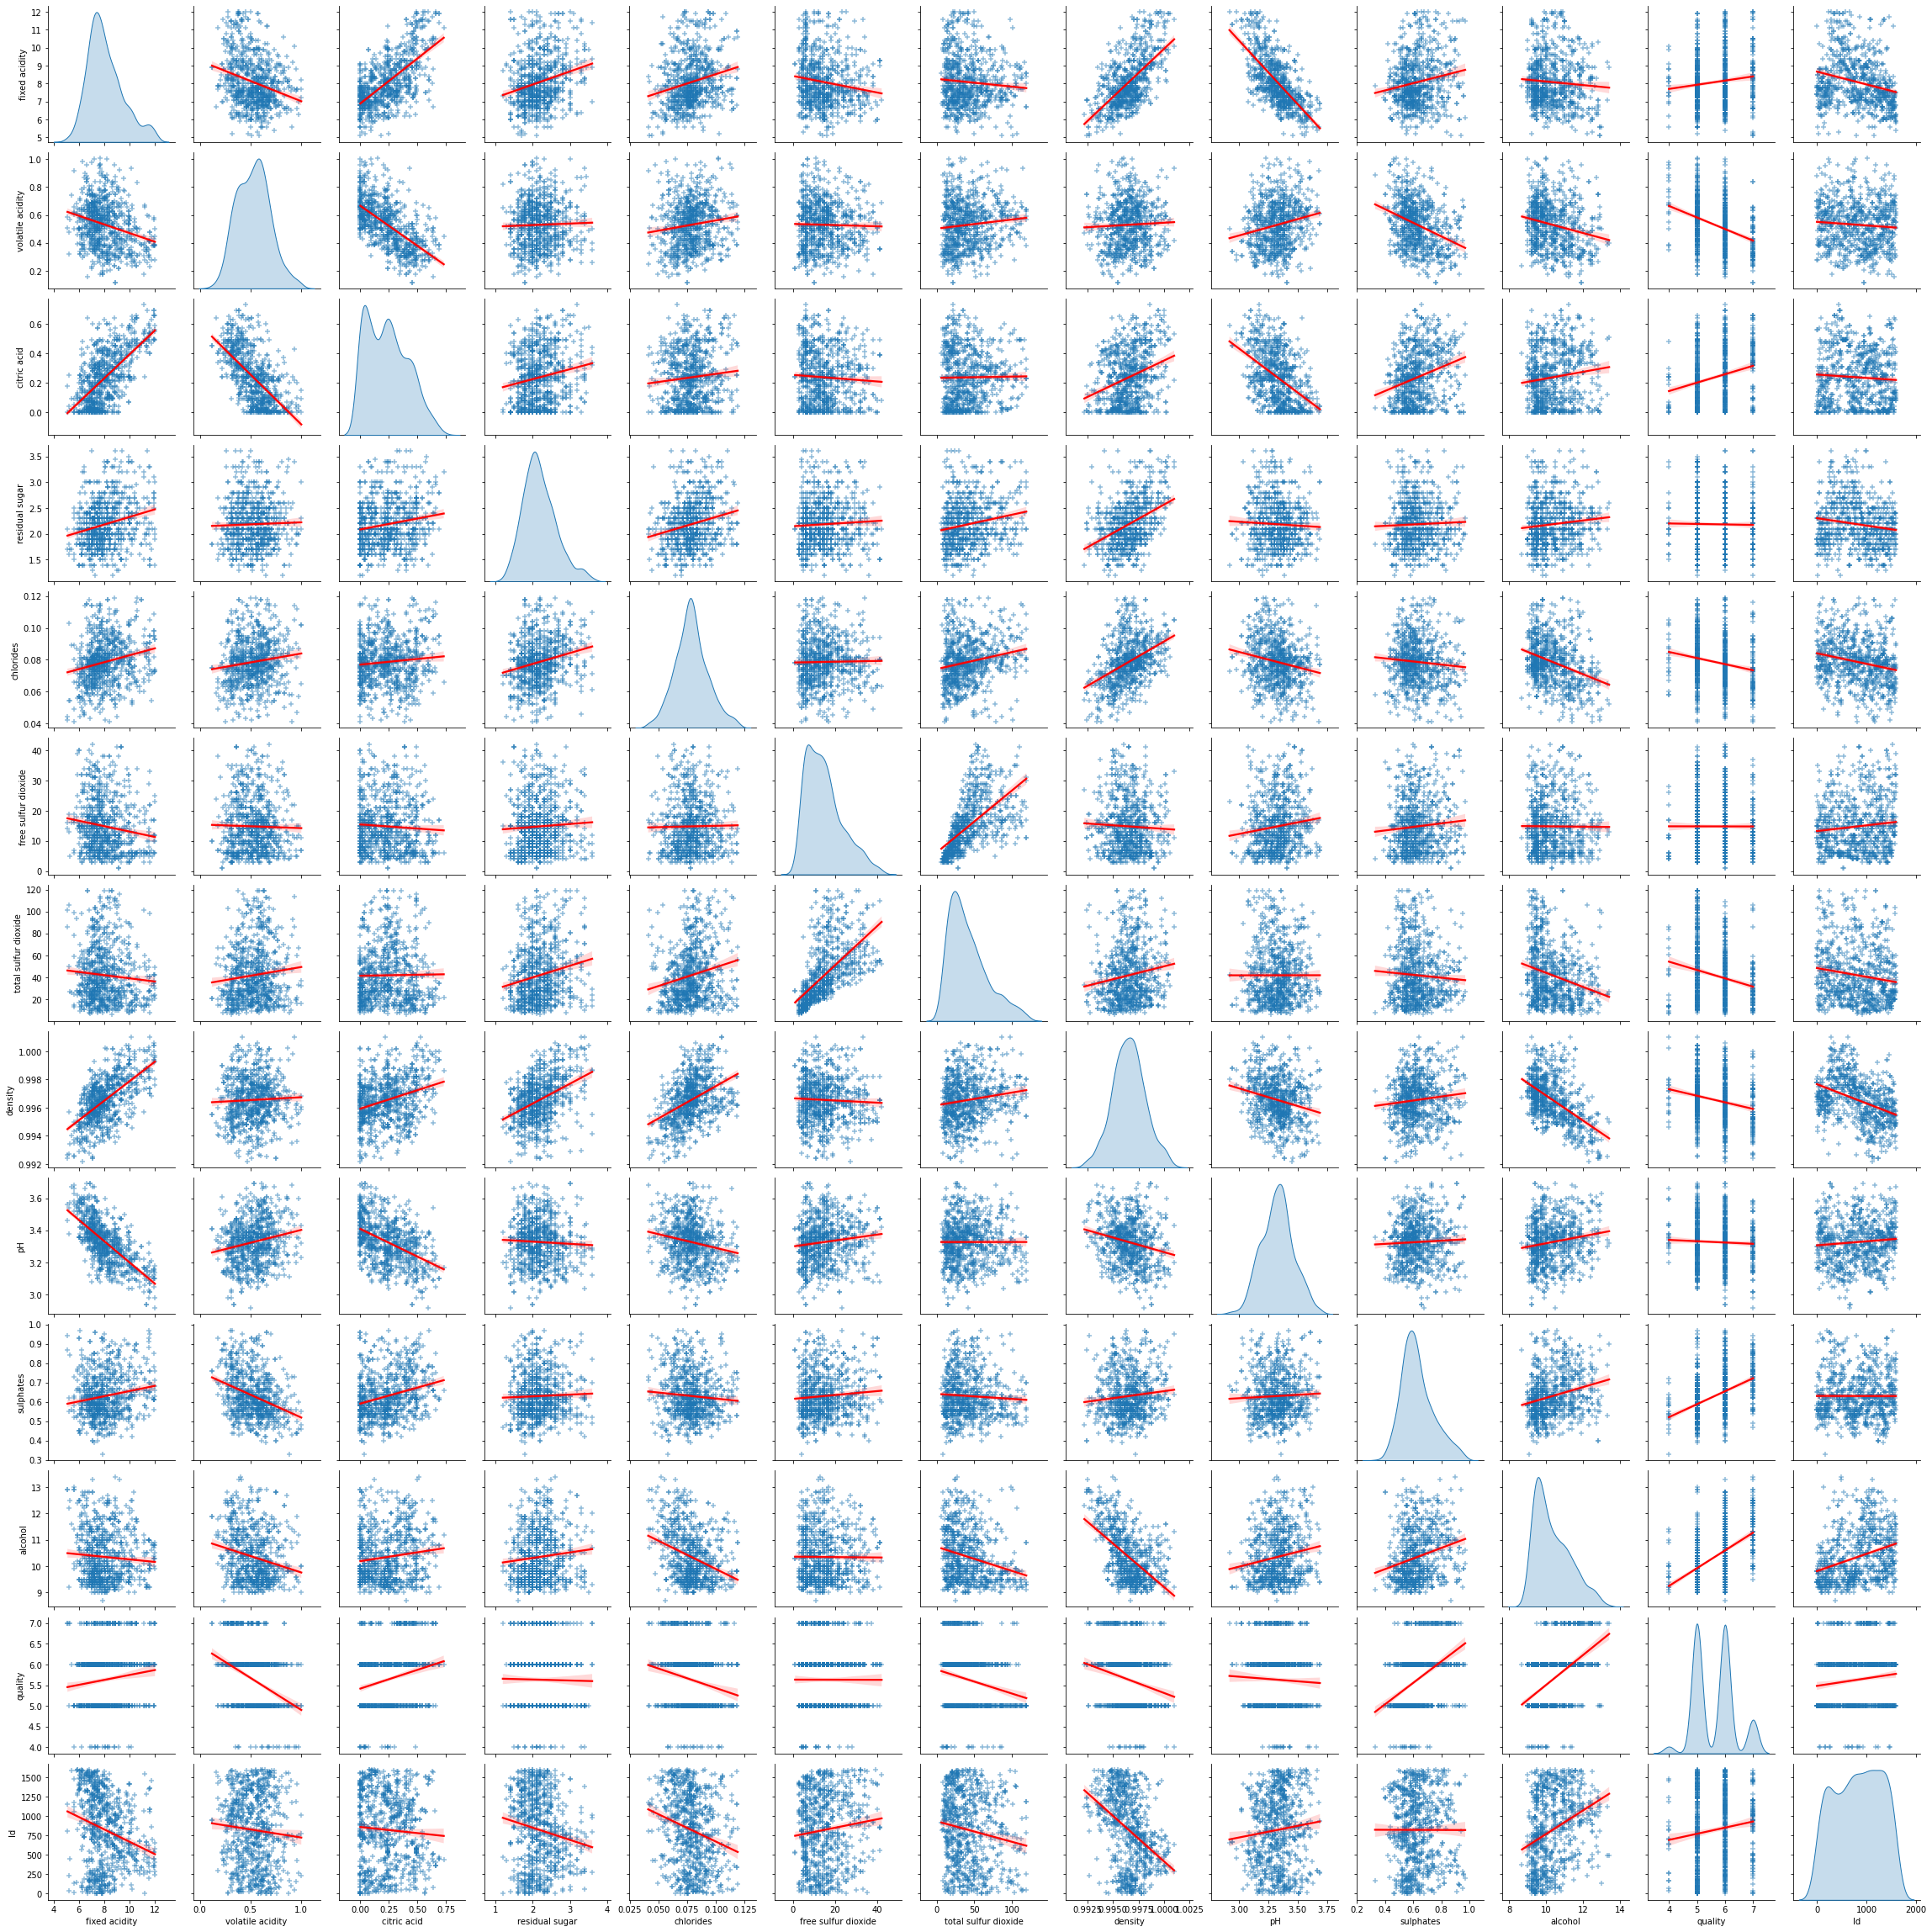

In [ ]:
sns.pairplot(df_wine,
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Pada pola sebaran data grafik pairplot di atas, terlihat fitur fixed acidity dan citric acid memiliki korelasi kuat (negatif / berkebalikan) dengan fitur quality (target). Sedangkan fitur lainnya yaitu tidak memiliki korelasi positif yang lemah dengan fitur quality. Untuk mengevaluasi skor korelasinya, kita akan gunakan fungsi corr() sebagai berikut

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

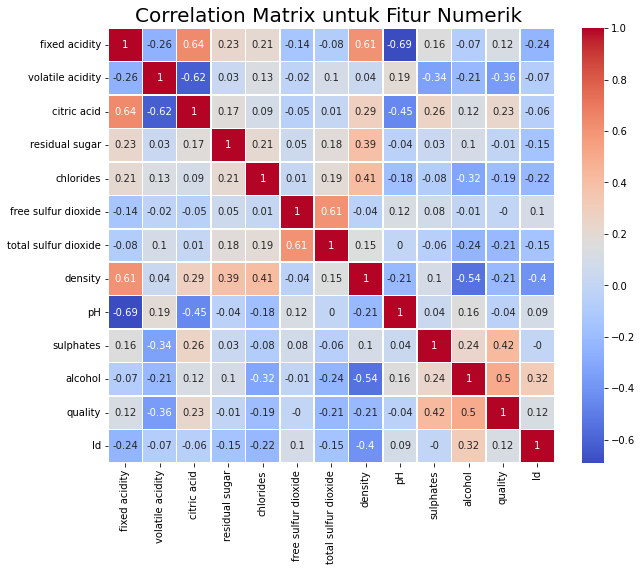

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_wine.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Koefisien korelasi berkisar antara -1 dan +1. Semakin dekat nilainya ke 1 atau -1, maka korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0 maka korelasinya semakin lemah.

Dari grafik korelasi di atas, fitur fixed acidity, volatile acidity, citric acid dan pH  memiliki korelasi yang kuat (mendekati -1, dibawah -0.85) dengan fitur target auqlity. Sementara itu, fitur residual sugar, chlorides dan sulphates mempunyai korelasi yang rendah dengan fitur target quality.

In [ ]:
list_fitur_hapus = ["residual sugar", "chlorides", "sulphates", "Id"]

In [ ]:
df_wine.drop(list_fitur_hapus, inplace=True, axis=1)
df_wine.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,quality
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,9.4,5
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,9.8,5
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,9.8,5
3,11.2,0.28,0.56,17.0,60.0,0.9980,3.16,9.8,6
4,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,9.4,5


## Data Preparation

### Reduksi dimensi dengan Principal Component Analysis (PCA).

PCA umumnya digunakan ketika variabel dalam data yang memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. Sebelumnya kita perlu cek kembali korelasi antar fitur dengan menggunakan pairplot.

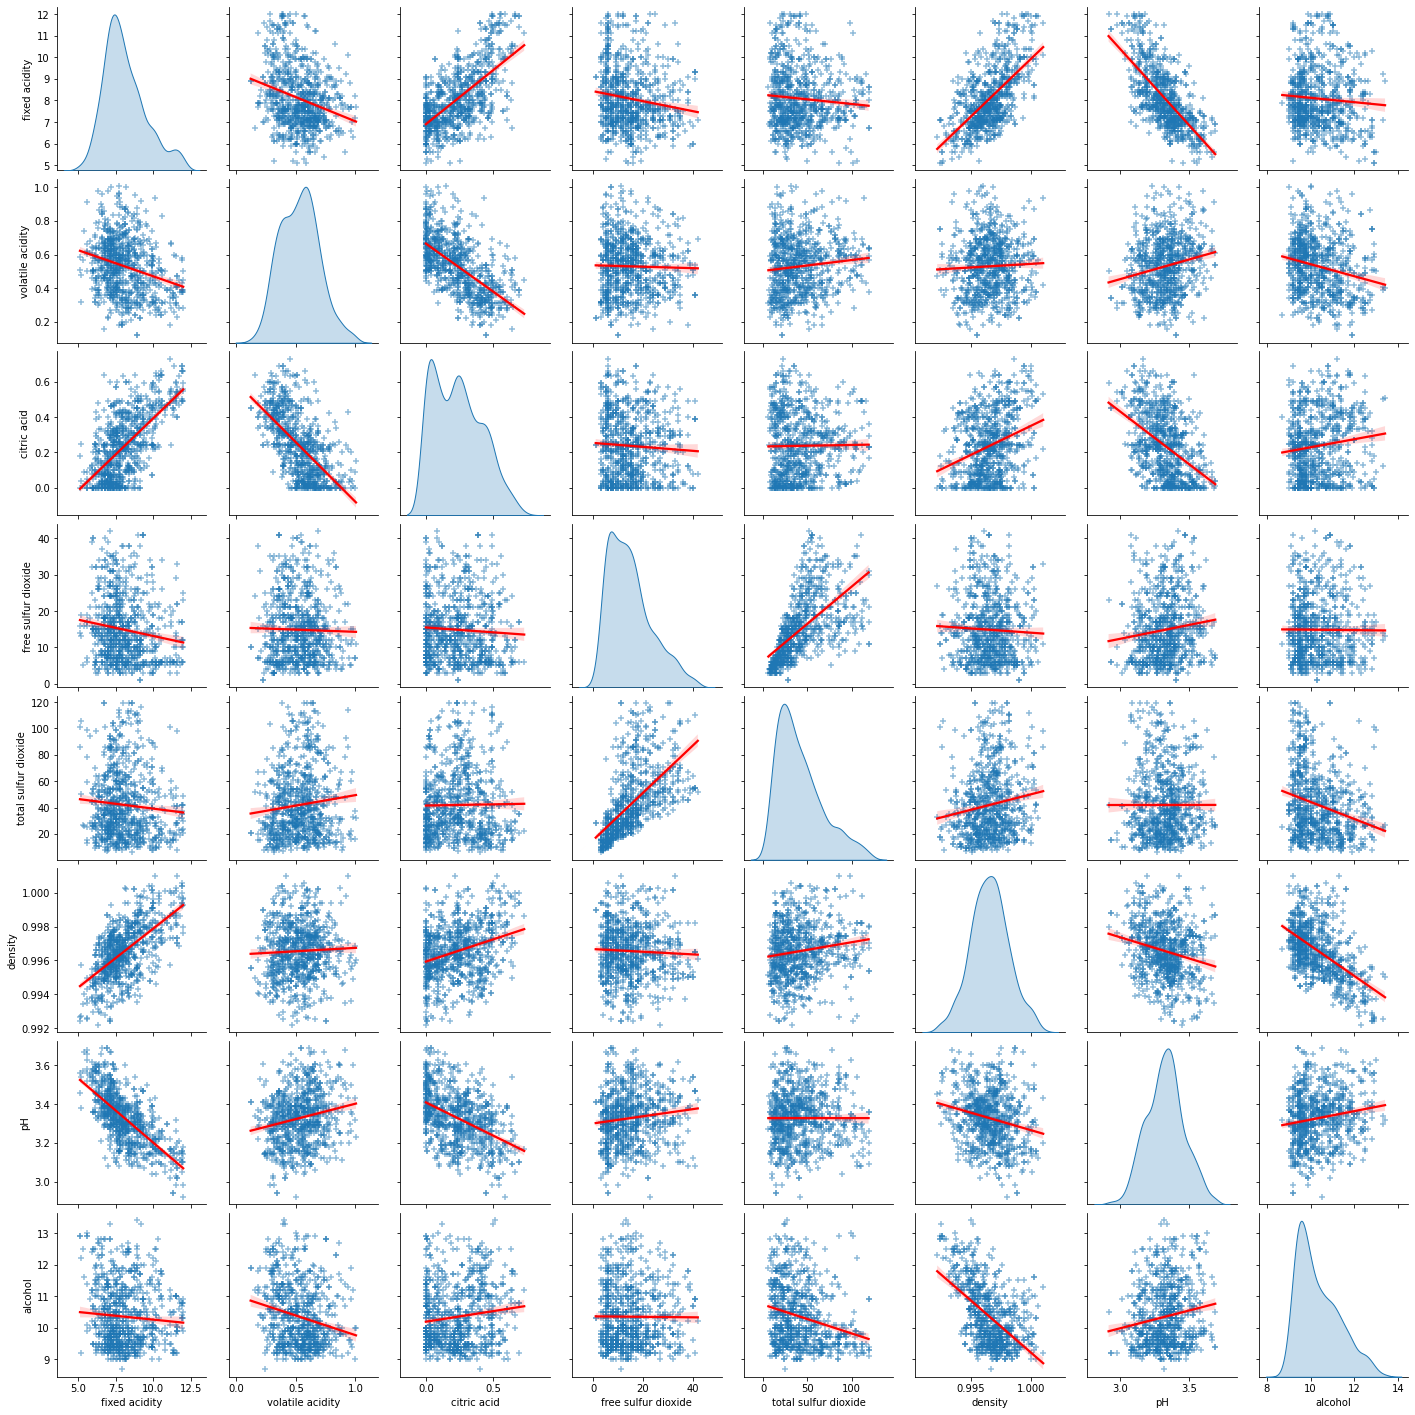

In [ ]:
sns.pairplot(df_wine.loc[:, df_wine.columns != 'quality'],
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Selanjutnya kita akan mereduksi 4 komponen citric acid, fixed acidity, volatile acidity dan Ph karena berkorelasi kuat yang dapat dilihat pada visualisasi pairplot di atas.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4, random_state=123)
pca.fit(df_wine[['citric acid', 'fixed acidity', 'volatile acidity', 'pH']])
princ_comp = pca.transform(df_wine[['citric acid', 'fixed acidity', 'volatile acidity', 'pH']])

Setelah menerapkan class PCA dengan n_components sebanyak fitur yang dikenakan PCA, kita bisa mengetahui proporsi informasi dari kedua komponen hasil PCA sebagai berikut:

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.974, 0.017, 0.005, 0.004])

Arti dari output di atas adalah, 97,4% informasi pada keempat fitur citric acid, fixed acidity, volatile acidity dan pH terdapat pada PC (Principal Component) pertama. Sedangkan sisanya sebesar 1,7%, 0,5% dan 0,4% terdapat pada PC kedua.

Berdasarkan hasil tersebut, kita akan mereduksi fitur dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur yang menggantikan keempat fitur lainnya. Kita beri nama fitur ini CFVP.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df_wine[['citric acid', 'fixed acidity', 'volatile acidity', 'pH']])
df_wine['CFVP'] = pca.transform(df_wine.loc[:, ('citric acid', 'fixed acidity', 'volatile acidity', 'pH')]).flatten()
df_wine.drop(['citric acid', 'fixed acidity', 'volatile acidity', 'pH'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_wine.head()

,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,CFVP
0,11.0,34.0,0.9978,9.4,5,-0.715927
1,25.0,67.0,0.9968,9.8,5,-0.303564
2,15.0,54.0,0.9970,9.8,5,-0.300447
3,17.0,60.0,0.9980,9.8,6,3.143393
4,11.0,34.0,0.9978,9.4,5,-0.715927


### Pembagian dataset dengan fungsi train_test_split dari library sklearn.

Kita akan membagi dataset menjadi data latih (train) dan data uji (test). Tujuan langkah ini sebelum proses lainnya adalah agar kita tidak mengotori data uji dengan informasi yang kita dapat dari data latih. Contoh pada proses standarisasi dimana jika belum di bagi menjadi data latih dan uji, maka keduanya akan terkena transformasi data yang menggunakan informasi (mean dan standard deviation) dari gabungan data latih dan uji. Hal ini berpotensi menimbulkan kebocoran data (data leakage). Oleh karena itu langkah awal sebelum melakukan tranformasi data adalah membagi dataset terlebih dahulu [2] (hal. 129).

Pada kasus ini kita akan menggunakan proporsi pembagian sebesar 90:10 dengan fungsi train_test_split dari sklearn.

In [ ]:
from sklearn.model_selection import train_test_split
 
X = df_wine.drop(["quality"],axis =1)
y = df_wine["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 834
Total # of sample in train dataset: 750
Total # of sample in test dataset: 84


### Standarisasi.

Proses standarisasi bertujuan untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandarScaler menghasilkan distribusi deviasi sama dengan 1 dan mean sama dengan 0.

In [ ]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol', 'CFVP']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,free sulfur dioxide,total sulfur dioxide,density,alcohol,CFVP
446,-0.900488,-0.413917,0.686706,-1.087267,0.474663
685,2.330928,1.189503,0.308333,-0.984725,-0.605762
616,0.138181,1.737012,0.611032,-0.677098,-0.627900
408,0.484405,0.016269,-1.205162,1.373748,-1.332822
121,-1.015896,-0.922318,0.434457,-1.189810,-0.031785


In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## Model Development

Pada tahap ini, kita akan menggunakan tiga algoritma untuk kasus regresi ini. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menetukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1. K-Nearest Neighbor
Kelebihan algoritma KNN adalah mudah dipahami dan digunakan sedangkan kekurangannya kika dihadapkan pada jumlah fitur atau dimensi yang besar rawan terjadi bias.

2. Random Forest
Kelebihan algoritma Random Forest adalah menggunakan teknik Bagging yang berusaha melawan overfitting dengan berjalan secara paralel. Sedangkan kekurangannya ada pada kompleksitas algoritma Random Forest yang membutuhkan waktu relatif lebih lama dan daya komputasi yang lebih tinggi dibanding algoritma seperti Decision Tree.

3. Boosting Algorithm
Kelebihan algoritma Boosting adalah menggunakan teknik Boosting yang berusaha menurunkan bias dengan berjalan secara sekuensial (memperbaiki model di tiap tahapnya). Sedangkan kekurangannya hampir sama dengan algoritma Random Forest dari segi kompleksitas komputasi yang menjadikan waktu pelatihan relatif lebih lama, selain itu noisy dan outliers sangat berpengaruh dalam algoritma ini.

Untuk langkah pertama, kita akan siapkan DataFrame baru untuk menampung nilai metrik (MSE - Mean Squared Error) pada setiap model / algoritma. Hal ini berguna untuk melakukan analisa perbandingan antar model.

In [ ]:
# Siapkan dataframe untuk analisis model
df_models = pd.DataFrame(index=['Train MSE', 'Test MSE'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbor

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih k tetangga terdekat. Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfitting dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k yang terlalu tinggi, maka model yang dihasilkan akan underfitting dan prediksinya memiliki bias yang tinggi [3] (Hal. 286).

Oleh karena itu, kita akan mencoba beberapa nilai k yang berbeda (1 sampai 20) kemudian membandingan mana yang menghasilkan nilai metrik model (pada kasus ini kita pakai mean squared error) terbaik. Selain itu, kita akan menggunakan metrik ukuran jarak secara default (Minkowski Distance) pada library sklearn.

In [ ]:
list_mse = []
for k in range(1, 21):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_prediction = knn.predict(X_test)
  test_mse = mean_squared_error(y_test, y_prediction)
  list_mse.append(test_mse)
  print(f"Nilai MSE untuk k = {k} adalah : {test_mse}")

Nilai MSE untuk k = 1 adalah : 0.6071428571428571
Nilai MSE untuk k = 2 adalah : 0.5
Nilai MSE untuk k = 3 adalah : 0.4391534391534392
Nilai MSE untuk k = 4 adalah : 0.42336309523809523
Nilai MSE untuk k = 5 adalah : 0.36952380952380953
Nilai MSE untuk k = 6 adalah : 0.353505291005291
Nilai MSE untuk k = 7 adalah : 0.36929057337220605
Nilai MSE untuk k = 8 adalah : 0.36811755952380953
Nilai MSE untuk k = 9 adalah : 0.37889476778365666
Nilai MSE untuk k = 10 adalah : 0.3705952380952381
Nilai MSE untuk k = 11 adalah : 0.37682014954742227
Nilai MSE untuk k = 12 adalah : 0.3759093915343915
Nilai MSE untuk k = 13 adalah : 0.37306283460129613
Nilai MSE untuk k = 14 adalah : 0.37263119533527694
Nilai MSE untuk k = 15 adalah : 0.3693650793650794
Nilai MSE untuk k = 16 adalah : 0.36509486607142855
Nilai MSE untuk k = 17 adalah : 0.3617564672927995
Nilai MSE untuk k = 18 adalah : 0.36302175191064073
Nilai MSE untuk k = 19 adalah : 0.35833003561535426
Nilai MSE untuk k = 20 adalah : 0.35613095238

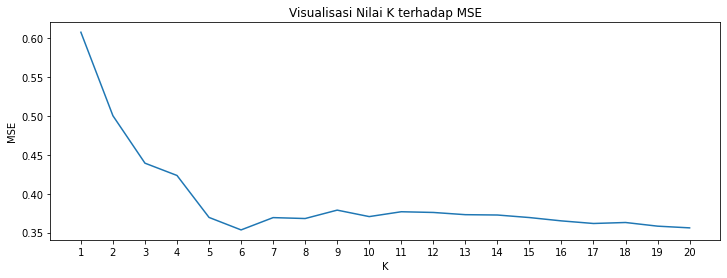

In [ ]:
pd.DataFrame(list_mse, index=range(1, 21)).plot(
    xlabel="K",
    ylabel="MSE",
    legend=False,
    xticks=range(1,21), 
    figsize=(12,4),
    title='Visualisasi Nilai K terhadap MSE')

Dari hasil output diatas, nilai MSE terbaik dicapai ketika k = 6 yaitu sebesar 0.35350. Oleh karena itu kita akan menggunakan k = 6 dan menyimpan nilai MSE nya (terhadap data latih, untuk data uji akan dilakukan pada proses evaluasi) kedalam df_models yang telah kita siapkan sebelumnya.

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=6)
KNN.fit(X_train, y_train)
df_models.loc['Train MSE', 'KNN'] = mean_squared_error(
    y_pred=KNN.predict(X_train),
    y_true=y_train)

### Random Forest

Random forest merupakan algoritma supervised learning yang termasuk ke dalam kategori ensemble (group) learning. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir. Jenis metode ensemble yang digunakan pada Random Forest adalah teknik Bagging. Metode ini bekerja dengan membuat subset dari data train yang independen. Beberapa model awal (base model / weak model) dibuat untuk dijalankan secara simultan / paralel dan independen satu sama lain dengan subset data train yang independen. Hasil prediksi setiap model kemudian dikombinasikan untuk menentukan hasil prediksi final.

Kita akan menggunakan RandomForestRegressor dari library scikit-learn dengan base_estimator defaultnya yaitu DecisionTreeRegressor dan parameter-parameter (hyperparameter) yang digunakan antara lain:

n_estimator: jumlah trees (pohon) di forest.
max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
random_state: digunakan untuk mengontrol random number generator yang digunakan.
n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

Untuk menentukan nilai hyperparameter (n_estimator & max_depth) di atas, kita akan melakukan tuning dengan GridSearchCV.
Keuntungan utama dari Grid Search adalah akurasi pembelajaran yang tinggi dan kemampuan pemrosesan paralel pada pelatihan setiap SVM, karena independen satu sama lain[4].

In [ ]:
params_rf = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "max_depth": [4, 8, 16, 32]
}

# Grid search model
gs_model = GridSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
    param_grid=params_rf,
    # Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scoring='neg_mean_squared_error', # Negatif dari nilai MSE
    verbose=3
)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .....max_depth=4, n_estimators=10;, score=-0.331 total time=   0.9s
[CV 2/5] END .....max_depth=4, n_estimators=10;, score=-0.413 total time=   0.1s
[CV 3/5] END .....max_depth=4, n_estimators=10;, score=-0.357 total time=   0.1s
[CV 4/5] END .....max_depth=4, n_estimators=10;, score=-0.387 total time=   0.1s
[CV 5/5] END .....max_depth=4, n_estimators=10;, score=-0.360 total time=   0.1s
[CV 1/5] END .....max_depth=4, n_estimators=20;, score=-0.322 total time=   0.1s
[CV 2/5] END .....max_depth=4, n_estimators=20;, score=-0.413 total time=   0.2s
[CV 3/5] END .....max_depth=4, n_estimators=20;, score=-0.349 total time=   0.2s
[CV 4/5] END .....max_depth=4, n_estimators=20;, score=-0.382 total time=   0.2s
[CV 5/5] END .....max_depth=4, n_estimators=20;, score=-0.359 total time=   0.1s
[CV 1/5] END .....max_depth=4, n_estimators=30;, score=-0.319 total time=   0.2s
[CV 2/5] END .....max_depth=4, n_estimators=30;

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=123),
             param_grid={'max_depth': [4, 8, 16, 32],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print("Hasil tuning hyperparameter", gs_model.best_params_)

print("Nilai MSE model GridSearchCV_RF dengan data latih", mean_squared_error(
    y_pred=gs_model.predict(X_train),
    y_true=y_train))
print("Nilai MSE model GridSearchCV_RF dengan data uji", mean_squared_error(
    y_pred=gs_model.predict(X_test),
    y_true=y_test))

Hasil tuning hyperparameter {'max_depth': 16, 'n_estimators': 30}
Nilai MSE model GridSearchCV_RF dengan data latih 0.049292350984323684
Nilai MSE model GridSearchCV_RF dengan data uji 0.39390449661487037


Dari hasil output di atas diperoleh nilai MSE terbaik dalam jangkauan parameter params_rf yaitu 0.04929 (dengan data train) dan 0.39390 (dengan data test) dengan n_estimators: 30 dan max_depth: 16. Selanjutnya kita akan menggunakan pengaturan parameter tersebut dan menyimpan nilai MSE nya kedalam df_models yang telah kita siapkan sebelumnya.

In [ ]:
RF = RandomForestRegressor(n_estimators=30, max_depth=16)
RF.fit(X_train, y_train)

df_models.loc['Train MSE', 'RandomForest'] = mean_squared_error(
    y_pred=RF.predict(X_train),
    y_true=y_train)

### Boosting Algorithm

Jika sebelumnya kita menggunakan algoritma bagging (Random Forest). Selanjutnya kita akan menggunakan metode lain dalam model ensemble yaitu teknik Boosting. Algoritma Boosting bekerja dengan membangun model dari data train. Kemudian membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. Teknik ini bekerja secara sekuensial.

Pada kasus ini kita akan menggunakan metode Adaptive Boosting. Untuk implementasinya kita menggunakan AdaBoostRegressor dari library sklearn dengan base_estimator defaultnya yaitu DecisionTreeRegressor hampir sama dengan RandomForestRegressor bedanya menggunakan metode teknik Boosting.

Parameter-parameter (hyperparameter) yang digunakan pada algoritma ini antara lain:

n_estimator: jumlah estimator dan ketika mencapai nilai jumlah tersebut algoritma Boosting akan dihentikan.
learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing iterasi Boosting.
random_state: digunakan untuk mengontrol random number generator yang digunakan.
Untuk menentukan nilai hyperparameter (n_estimator & learning_rate) di atas, kita akan melakukan tuning dengan GridSearchCV.

In [ ]:
params_ab = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "learning_rate": [0.001, 0.01, 0.1, 0.2]
}

# Grid search model
gs_model_ab = GridSearchCV(
    estimator=AdaBoostRegressor(random_state=123),
    param_grid=params_ab,
    # Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scoring='neg_mean_squared_error', # Negatif dari nilai MSE
    verbose=3
)

gs_model_ab.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.001, n_estimators=10;, score=-0.334 total time=   0.0s
[CV 2/5] END learning_rate=0.001, n_estimators=10;, score=-0.427 total time=   0.0s
[CV 3/5] END learning_rate=0.001, n_estimators=10;, score=-0.360 total time=   0.0s
[CV 4/5] END learning_rate=0.001, n_estimators=10;, score=-0.413 total time=   0.0s
[CV 5/5] END learning_rate=0.001, n_estimators=10;, score=-0.378 total time=   0.0s
[CV 1/5] END learning_rate=0.001, n_estimators=20;, score=-0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.001, n_estimators=20;, score=-0.424 total time=   0.0s
[CV 3/5] END learning_rate=0.001, n_estimators=20;, score=-0.354 total time=   0.0s
[CV 4/5] END learning_rate=0.001, n_estimators=20;, score=-0.410 total time=   0.0s
[CV 5/5] END learning_rate=0.001, n_estimators=20;, score=-0.382 total time=   0.0s
[CV 1/5] END learning_rate=0.001, n_estimators=30;, score=-0.335 total time=   0.1s
[CV 2/5] END l

GridSearchCV(estimator=AdaBoostRegressor(random_state=123),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print("Hasil tuning hyperparameter", gs_model_ab.best_params_)

# AB = AdaBoosting
print("Nilai MSE model GridSearchCV_AB dengan data latih", mean_squared_error(
    y_pred=gs_model_ab.predict(X_train),
    y_true=y_train))
print("Nilai MSE model GridSearchCV_AB dengan data uji", mean_squared_error(
    y_pred=gs_model_ab.predict(X_test),
    y_true=y_test))

Hasil tuning hyperparameter {'learning_rate': 0.2, 'n_estimators': 90}
Nilai MSE model GridSearchCV_AB dengan data latih 0.33116537794773415
Nilai MSE model GridSearchCV_AB dengan data uji 0.3524856046953491


Dari hasil output di atas diperoleh nilai MSE terbaik dalam jangkauan parameter params_ab yaitu 0.33116 (dengan data train) dan 0.35248 (dengan data test) dengan n_estimators: 90 dan learning_rate: 0.2. Selanjutnya kita akan menggunakan pengaturan parameter tersebut dan menyimpan nilai MSE nya kedalam df_models yang telah kita siapkan sebelumnya.

In [ ]:
boosting = AdaBoostRegressor(n_estimators=90, learning_rate=0.2)
boosting.fit(X_train, y_train)

df_models.loc['Train MSE', 'Boosting'] = mean_squared_error(
    y_pred=boosting.predict(X_train),
    y_true=y_train)

## Evaluasi

Dari proses sebelumnya, kita telah membuat tiga model yang berbeda dan juga telah melatihnya. Selanjutnya kita perlu mengevaluasi model-model tersebut menggunakan data uji dan metrik yang digunakan dalam kasus ini yaitu mean_squared_error. Hasil evaluasi kemudian kita simpan ke dalam df_models.

In [ ]:
for name, model in {'KNN': KNN, 'RandomForest': RF, 'Boosting': boosting}.items():
  df_models.loc['Test MSE', name] = mean_squared_error(
      y_pred=model.predict(X_test),
      y_true=y_test)
  
# Mengecek evaluasi model
display(df_models)

,KNN,RandomForest,Boosting
Train MSE,0.275889,0.050118,0.32955
Test MSE,0.353505,0.377711,0.357394


Untuk memudahkan, mari kita plot hasil evaluasi model dengan bar chart.

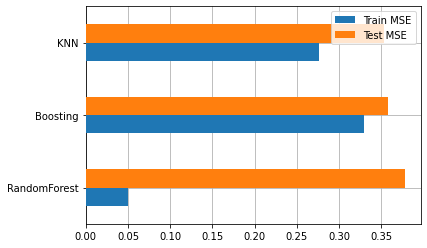

In [ ]:
fig, ax = plt.subplots()
df_models.T.sort_values(by='Test MSE', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model RandomForest memberikan nilai eror (MSE) yang paling kecil. Sedangkan model algoritma Boosting memiliki eror yang paling besar. Sebelum memutuskan model terbaik untuk melakukan prediksi Quality pada wine atau besarnya daya yang dihasilkan. Mari kita coba uji prediksi menggunakan beberapa sampel acak (5) pada data uji.

In [ ]:
dict_result = {
    'index_sample': [],
    'y_true': [],
    'prediksi_KNN': [],
    'prediksi_RF': [],
    'prediksi_Boosting': []
}

X_sample = X_test.sample(5)
dict_result['index_sample'] = X_sample.index.values
dict_result['y_true'] = [pd.DataFrame(y_test).loc[idx, 'quality'] for idx in dict_result['index_sample']]

for name, model in {'KNN': KNN, 'RF': RF, 'Boosting': boosting}.items():
  dict_result['prediksi_' + name] = model.predict(X_sample)

display(pd.DataFrame(dict_result).set_index('index_sample'))

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
index_sample,,,,
229,5,5.166667,5.133333,5.302139
283,7,6.166667,6.241667,6.061135
658,7,7.000000,6.633333,6.316176
50,4,5.500000,5.200000,5.303922
42,5,5.000000,5.035294,5.280899


Terlihat bahwa prediksi dengan K-Nearest Neighbor memberikan hasil yang paling mendekati.

#Kesimpulan

Berdasarkan hasil evaluasi model di atas, dapat disimpulkan bahwa model terbaik untuk melakukan prediksi Kualitas Wine adalah Model RandomForest pada Data Latih dengan nilai 0.050118 dan Model terbaik pada Data Uji yaitu Model K-Nearest Neighbor dengan nilai 0.353505. Diharapkan dengan dibangunnya model ini dapat menjadi pedoman perusahaan dalam menentukan kualitas wine yang berdampak pada kenaikan pendapatan.

#Daftar Referensi

[1] Seltman, Howard J. “Experimental Design and Analysis”. 2018. Tersedia: tautan. Diakses pada Oktober 2022.

[2] Fuentes, Alvaro. "Hands-on Predictive Analytics with Python". Packt Publishing. 2018. Tersedia: O'Reilly Media.

[3] Rhys, Hefin. "Machine Learning with R, the Tidyverse, and MLR". Manning Publications. 2020. Tersedia: O'Reilly Media.

[4] Zakrani, A., Najm, A., & Marzak, A. (2018). Support Vector Regression Based on Grid-Search Method for Agile Software Effort Prediction. Colloquium in Information Science and Technology, 8(2): 26-32.